# Aiida

## Define workflow with aiida

In [1]:
from python_workflow_definition.aiida import write_workflow_json

from aiida_workgraph import WorkGraph, task
from aiida import orm, load_profile
load_profile()

workflow_json_filename =  "aiida_simple.json"

In [2]:
from workflow import (
    get_sum as _get_sum,
    get_prod_and_div as _get_prod_and_div,
    get_square as _get_square,
)

In [3]:
wg = WorkGraph("arithmetic")

In [4]:
get_prod_and_div_task = wg.add_task(
    task(outputs=['prod', 'div'])(_get_prod_and_div),
    x=orm.Float(1),
    y=orm.Float(2),
)

In [5]:
get_sum_task = wg.add_task(
    _get_sum,
    x=get_prod_and_div_task.outputs.prod,
    y=get_prod_and_div_task.outputs.div,
)

In [6]:
get_square_task = wg.add_task(
    _get_square,
    x=get_sum_task.outputs.result,
)

In [7]:
write_workflow_json(wg=wg, file_name=workflow_json_filename)

In [8]:
!cat {workflow_json_filename}

───────┬────────────────────────────────────────────────────────────────────────
       │ File: aiida_simple.json
───────┼────────────────────────────────────────────────────────────────────────
   1   │ {
   2   │   "version": "0.1.0",
   3   │   "nodes": [
   4   │     {
   5   │       "id": 0,
   6   │       "type": "function",
   7   │       "value": "workflow.get_prod_and_div"
   8   │     },
   9   │     {
  10   │       "id": 1,
  11   │       "type": "function",
  12   │       "value": "workflow.get_sum"
  13   │     },
  14   │     {
  15   │       "id": 2,
  16   │       "type": "function",
  17   │       "value": "workflow.get_square"
  18   │     },
  19   │     {
  20   │       "id": 3,
  21   │       "type": "input",
  22   │       "name": "x",
  23   │       "value": 1.0
  24   │     },
  25   │     {
  26   │       "id": 4,
  27   │       "type": "input",
  28   │       "name": "y",
  29   │       "value": 2.0
  30   │     },
  31   │     {
  32   │       "id": 5,
  33 

## Load Workflow with jobflow

In [9]:
from python_workflow_definition.jobflow import load_workflow_json

In [10]:
from jobflow.managers.local import run_locally

In [11]:
flow = load_workflow_json(file_name=workflow_json_filename)

In [12]:
result = run_locally(flow)
result

2025-10-22 15:11:59,264 INFO Started executing jobs locally
2025-10-22 15:11:59,721 INFO Starting job - get_prod_and_div (108c8efc-0f7a-49bb-aa8f-5b7f4f87d462)
2025-10-22 15:11:59,725 INFO Finished job - get_prod_and_div (108c8efc-0f7a-49bb-aa8f-5b7f4f87d462)
2025-10-22 15:11:59,726 INFO Starting job - get_sum (3bec2f12-bced-424e-a526-b87f3130741d)
2025-10-22 15:11:59,729 INFO Finished job - get_sum (3bec2f12-bced-424e-a526-b87f3130741d)
2025-10-22 15:11:59,730 INFO Starting job - get_square (e04b23d9-f6ad-4694-b229-6b18264dd501)
2025-10-22 15:11:59,733 INFO Finished job - get_square (e04b23d9-f6ad-4694-b229-6b18264dd501)
2025-10-22 15:11:59,734 INFO Finished executing jobs locally


{'108c8efc-0f7a-49bb-aa8f-5b7f4f87d462': {1: Response(output={'prod': 2.0, 'div': 0.5}, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/geiger_j/aiida_projects/adis/git-repos/python-workflow-definition/example_workflows/arithmetic'))},
 '3bec2f12-bced-424e-a526-b87f3130741d': {1: Response(output=2.5, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/geiger_j/aiida_projects/adis/git-repos/python-workflow-definition/example_workflows/arithmetic'))},
 'e04b23d9-f6ad-4694-b229-6b18264dd501': {1: Response(output=6.25, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/geiger_j/aiida_projects/adis/git-repos/python-workflow-definition/example_workflows/arithmetic'))}}

## Load Workflow with pyiron_base

In [13]:
from python_workflow_definition.pyiron_base import load_workflow_json

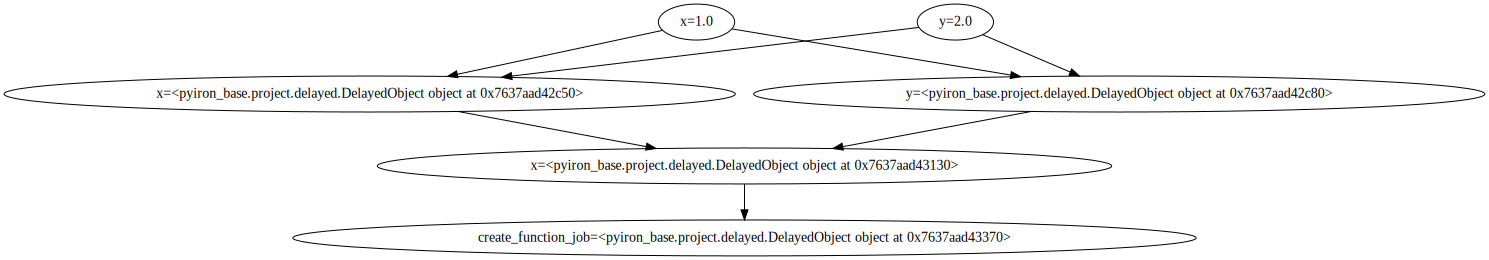

In [14]:
delayed_object_lst = load_workflow_json(file_name=workflow_json_filename)
delayed_object_lst[-1].draw()

In [15]:
delayed_object_lst[-1].pull()

The job get_prod_and_div_4729edf2c689ca4cf512acd163c98b28 was saved and received the ID: 1
The job get_sum_25f72a559657d0b1549593792391953e was saved and received the ID: 2
The job get_square_9cc2f0545498916d7720c59c1120a66d was saved and received the ID: 3


6.25